In [1]:
import numpy as np
import pandas as pd
years=['2019A', '2020F', '2021F', '2022F', '2023F', '2024F']
sales = pd.Series(index=years)
sales['2019A'] = 15
sales

2019A    15.0
2020F     NaN
2021F     NaN
2022F     NaN
2023F     NaN
2024F     NaN
dtype: float64

In [2]:
growth_rate = 0.1
# Loop to populate the data series of sales
for year in range(1,6):
    sales[year] = sales[year-1] * (1+growth_rate)

In [3]:
sales

2019A    15.00000
2020F    16.50000
2021F    18.15000
2022F    19.96500
2023F    21.96150
2024F    24.15765
dtype: float64

In [4]:
ebitda_margin = 0.20
depr_percent = 0.03
ebitda = sales * ebitda_margin
depreciation = sales * depr_percent
ebit = ebitda - depreciation
tax_rate = 0.30
tax_payment = -ebit * tax_rate
tax_payment = tax_payment.apply(lambda x: min(x,0))
nopat = ebit + tax_payment
nopat

2019A    1.785000
2020F    1.963500
2021F    2.159850
2022F    2.375835
2023F    2.613419
2024F    2.874760
dtype: float64

In [5]:
#  Net Working Capital (NWC)
nwc_percent = 0.24
nwc = sales * nwc_percent
change_in_nwc = nwc.shift(1) - nwc
capex_percent = depr_percent
capex = -(sales * capex_percent)

In [6]:
free_cash_flow = nopat + depreciation + capex + change_in_nwc
free_cash_flow

2019A         NaN
2020F    1.603500
2021F    1.763850
2022F    1.940235
2023F    2.134259
2024F    2.347684
dtype: float64

In [7]:
cost_of_capital = 0.10
terminal_growth = 0.02
terminal_value = ((free_cash_flow[-1] * (1 + terminal_growth))/
                 (cost_of_capital - terminal_growth))
discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,6)]
dcf_value = (sum(free_cash_flow[1:]*discount_factors) +
            terminal_value * discount_factors[-1])
dcf_value

25.874659090909088

In [8]:
discount_factors

[0.9090909090909091,
 0.8264462809917354,
 0.7513148009015777,
 0.6830134553650706,
 0.620921323059155]

In [9]:
terminal_value

29.9329754625

In [10]:
# Exporting the Data to Excel
output = pd.DataFrame([sales, ebit, tax_payment, nopat, 
                       depreciation, capex, change_in_nwc,
                       free_cash_flow],
                     index=["Sales", "EBIT", "Tax Expense", 
                            "NOPAT", "D&A Expense",
                            "Capital Expenditures",
                            "Increase in NWC",
                            "Free Cash Flow"]).round(2)
output.to_excel('Python DCF Model.xlsx')
output

,2019A,2020F,2021F,2022F,2023F,2024F
Sales,15.00,16.50,18.15,19.97,21.96,24.16
EBIT,2.55,2.80,3.09,3.39,3.73,4.11
Tax Expense,-0.76,-0.84,-0.93,-1.02,-1.12,-1.23
NOPAT,1.78,1.96,2.16,2.38,2.61,2.87
D&A Expense,0.45,0.50,0.54,0.60,0.66,0.72
Capital Expenditures,-0.45,-0.50,-0.54,-0.60,-0.66,-0.72
Increase in NWC,NaN,-0.36,-0.40,-0.44,-0.48,-0.53
Free Cash Flow,NaN,1.60,1.76,1.94,2.13,2.35


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

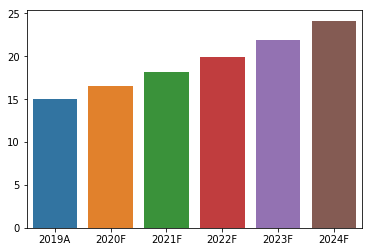

In [25]:
sns.barplot(x = output.columns, y = sales)
plt.xticks;

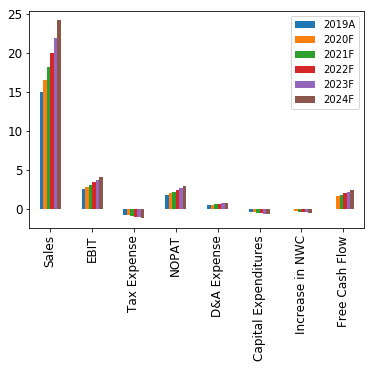

In [19]:
output.plot(kind='bar')
plt.tick_params(labelsize = 12);